In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize


In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7cc4bd9bbee0>)

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]


In [6]:
print('총 샘플의 개수 : {}'.format(len(result)))


총 샘플의 개수 : 273424


In [7]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)


['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [8]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)


In [9]:
model_result = model.wv.most_similar("man")
print(model_result)


[('woman', 0.8552259802818298), ('guy', 0.8161975145339966), ('boy', 0.7844752073287964), ('girl', 0.7746891379356384), ('lady', 0.7656533718109131), ('gentleman', 0.7366472482681274), ('soldier', 0.7228438854217529), ('poet', 0.7050417065620422), ('kid', 0.7003698348999023), ('peter', 0.6644109487533569)]


In [10]:
#google : gensim 검색

In [11]:
model.wv.vectors[0]

array([-0.16207884, -0.42153275,  0.16646366,  0.86984724, -0.575588  ,
       -1.2542139 , -0.7225795 , -1.0315427 ,  1.107417  ,  1.5375748 ,
        0.04487853, -0.5593729 ,  0.07430544,  1.3170995 , -0.48047966,
        0.288267  ,  0.25442305, -1.1107836 , -2.7642639 , -0.53238904,
        1.308127  ,  1.0143898 , -0.54415643, -0.90204185,  0.48655662,
       -2.9498172 , -0.06549376,  0.49567017,  1.3824433 ,  0.06859812,
       -0.09618932, -0.15229881,  0.97219026, -1.0855384 , -0.6384212 ,
       -0.29479513,  0.14047636, -1.6040636 , -0.42722696, -0.60039896,
       -0.7050643 ,  0.23658045,  0.17024854, -1.8176687 , -0.26402387,
        0.05269298, -1.5311103 ,  0.7900423 ,  1.2063789 , -1.0255448 ,
       -0.5429094 ,  1.341028  ,  0.9728887 ,  0.5751939 , -0.53403115,
        0.41312903,  0.2203373 , -1.535796  , -1.6919836 ,  0.549524  ,
        0.00969884,  0.98397136,  0.8331128 , -1.5673611 ,  0.08094496,
       -0.4632717 , -0.95873594,  0.29754457, -0.22662053, -0.47

In [12]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드


In [14]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 41.5 MB/s eta 0:00:00


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt


In [16]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x7cc443751210>)

In [17]:
train_data = pd.read_table('ratings.txt')


In [18]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [19]:
print(len(train_data)) # 리뷰 개수 출력


200000


In [20]:
200000


200000

In [21]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())


True


In [22]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인


False


In [23]:
print(len(train_data)) # 리뷰 개수 출력


199992


In [24]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [25]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [29]:
from tqdm import tqdm

In [30]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 199992/199992 [24:27<00:00, 136.29it/s]


리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.338453538141525


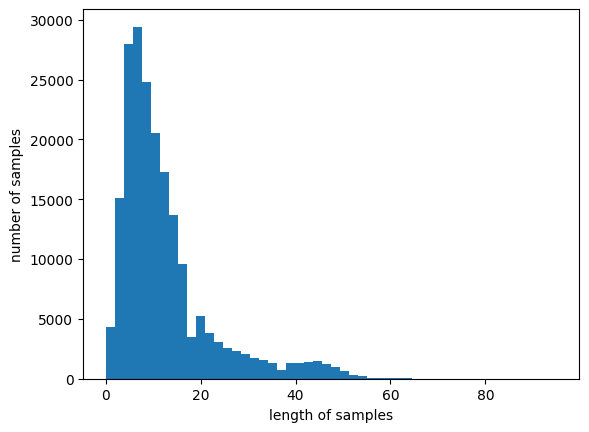

In [31]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [32]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)


In [33]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape


(17615, 100)

In [34]:
print(model.wv.most_similar("최민식"))


[('한석규', 0.867579996585846), ('최민수', 0.8561229109764099), ('이정재', 0.8381696343421936), ('송강호', 0.8355893492698669), ('윤제문', 0.8330833911895752), ('김갑수', 0.827879786491394), ('홉킨스', 0.8277416825294495), ('안소니', 0.8245036602020264), ('박신양', 0.8211374878883362), ('안성기', 0.8195552825927734)]


In [35]:
print(model.wv.most_similar("히어로"))


[('슬래셔', 0.8674064874649048), ('sf', 0.8363044857978821), ('무협', 0.829700231552124), ('물', 0.8261977434158325), ('블록버스터', 0.8193304538726807), ('호러', 0.8163698315620422), ('물의', 0.8075538873672485), ('무비', 0.801084041595459), ('느와르', 0.7863051891326904), ('SF', 0.7770870327949524)]


In [36]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)


HTTPError: HTTP Error 404: Not Found

In [ ]:
print(word2vec_model.vectors.shape)


In [ ]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

#gensim에서 api refernce가서 similarity 찾기

In [ ]:
print(word2vec_model['book'])


In [39]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/fastText/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-07-11 02:29:50--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachme

In [38]:
# fasttext 설치
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 3998 (delta 890), reused 859 (delta 826), pack-reused 2972
Receiving objects: 100% (3998/3998), 8.30 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (2528/2528), done.
/content/fastText
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++17 -march=na

In [41]:
# 한글 자모 단위 처리 패키지 설치
!pip install hgtk

In [42]:
import re
import pandas as pd
import urllib.request
from tqdm import tqdm
import hgtk
from konlpy.tag import Mecab

In [43]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7cc415f17580>)

In [44]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [45]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [46]:
# 한글인지 체크
hgtk.checker.is_hangul('ㄱ')

True

In [47]:
# 한글인지 체크
hgtk.checker.is_hangul('28')

False

In [48]:
# 음절을 초성, 중성, 종성으로 분해
hgtk.letter.decompose('남')

('ㄴ', 'ㅏ', 'ㅁ')

In [49]:
# 초성, 중성을 결합
hgtk.letter.compose('ㄴ', 'ㅏ')

'나'

In [50]:
# 초성, 중성, 종성을 결합
hgtk.letter.compose('ㄴ', 'ㅏ', 'ㅁ')

'남'

In [51]:
# 한글이 아닌 입력에 대해서는 에러 발생.
hgtk.letter.decompose('1')

NotHangulException: 

In [52]:
def word_to_jamo(token):
  def to_special_token(jamo):
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [53]:
word_to_jamo('남동생')

'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

In [54]:
mecab = Mecab()

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [55]:
okt = Okt()

In [57]:
print(okt.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받아서', '전달', '했어야', '하는', '상품', '이었는데', '머그컵', '만', '와서', '당황', '했습니다', '.']


In [60]:
def tokenize_by_jamo(s):
    return [word_to_jamo(token) for token in okt.morphs(s)]

In [61]:
print(tokenize_by_jamo('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['ㅅㅓㄴㅁㅜㄹ', 'ㅇㅛㅇ', 'ㅇㅡ-ㄹㅗ-', 'ㅃㅏㄹㄹㅣ-', 'ㅂㅏㄷㅇㅏ-ㅅㅓ-', 'ㅈㅓㄴㄷㅏㄹ', 'ㅎㅐㅆㅇㅓ-ㅇㅑ-', 'ㅎㅏ-ㄴㅡㄴ', 'ㅅㅏㅇㅍㅜㅁ', 'ㅇㅣ-ㅇㅓㅆㄴㅡㄴㄷㅔ-', 'ㅁㅓ-ㄱㅡ-ㅋㅓㅂ', 'ㅁㅏㄴ', 'ㅇㅘ-ㅅㅓ-', 'ㄷㅏㅇㅎㅘㅇ', 'ㅎㅐㅆㅅㅡㅂㄴㅣ-ㄷㅏ-', '.']


In [62]:
tokenized_data = []

for sample in tqdm(total_data['reviews'].to_list()):
    tokenzied_sample = tokenize_by_jamo(sample) # 자소 단위 토큰화
    tokenized_data.append(tokenzied_sample)

100%|██████████| 200000/200000 [33:50<00:00, 98.49it/s]


In [63]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0

  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']

In [65]:
  word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

SyntaxError: 'return' outside function (<ipython-input-65-56cc9ce042f3>, line 21)

In [ ]:
jamo_to_word('ㄴㅏㅁㄷㅗㅇㅅㅐㅇ')

In [ ]:
import fasttext

In [ ]:
with open('tokenized_data.txt', 'w') as out:
  for line in tqdm(tokenized_data, unit=' line'):
    out.write(' '.join(line) + '\n')

In [ ]:
model = fasttext.train_unsupervised('tokenized_data.txt', model='cbow')

In [ ]:
model[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

In [ ]:
model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)

In [ ]:
def transform(word_sequence):
  return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [ ]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))